# Task 4: Alternative Model (Random Forest Regressor)

In this section, we implement a **Random Forest Regressor** as our alternative model to compare against the Linear Regression baseline.

**Model Justification:**
We selected the Random Forest Regressor for the following reasons:
1.  **Handling Non-Linearity:** The food demand logic contains "cutoff" points (e.g., flight duration > 6 hours triggers an extra meal). Linear regression struggles with these sudden jumps, but Decision Trees (and by extension, Random Forests) handle them perfectly.
2.  **Robustness:** Random Forest averages the results of many trees, reducing the risk of overfitting compared to a single Decision Tree.
3.  **Feature Importance:** As required by the project rubric, this model allows us to extract and visualize exactly which features (e.g., Duration vs. Passenger Count) drive the food demand predictions.

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('airline_food_data_last.csv')

print(f"Data Loaded. Shape: {df.shape}")
df.head()

Data Loaded. Shape: (5000, 8)


,flight_id,flight_duration,passenger_count,adult_passengers,child_passengers,business_class_ratio,is_international,total_food_demand
0,1,5.33,232,173,59,0.16,0,245
1,2,7.26,145,124,21,0.12,1,162
2,3,10.69,85,82,3,0.03,1,121
3,4,4.74,163,149,14,0.12,0,180
4,5,10.57,86,69,17,0.22,0,126


In [3]:
X = df.drop(['flight_id', 'total_food_demand'], axis=1)
y = df['total_food_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 4000
Testing samples: 1000


In [4]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=28)

print("Training Random Forest Model...")
rf_model.fit(X_train, y_train)
print("Training Complete.")

Training Random Forest Model...
Training Complete.


In [5]:
y_pred_rf = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Performance Metrics:")
print(f"R-squared (R2): {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")

Random Forest Performance Metrics:
R-squared (R2): 0.9940
Mean Absolute Error (MAE): 4.75
Root Mean Squared Error (RMSE): 5.95


/tmp/ipython-input-2624466721.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


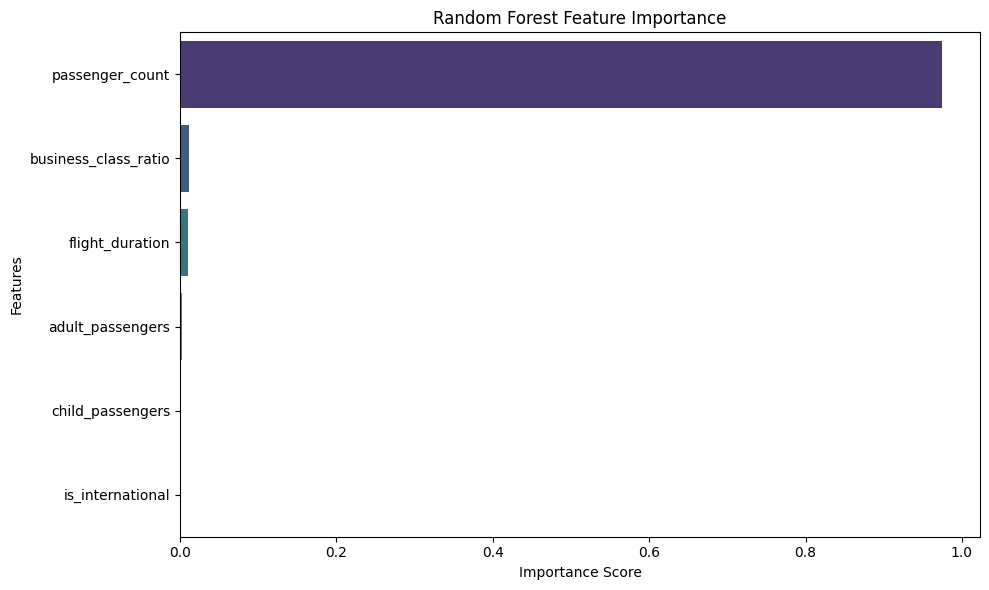

                Feature  Importance
1       passenger_count    0.974439
4  business_class_ratio    0.011281
0       flight_duration    0.010555
2      adult_passengers    0.002584
3      child_passengers    0.000988
5      is_international    0.000153


In [6]:
importances = rf_model.feature_importances_
feature_names = X.columns

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print(feature_imp_df)

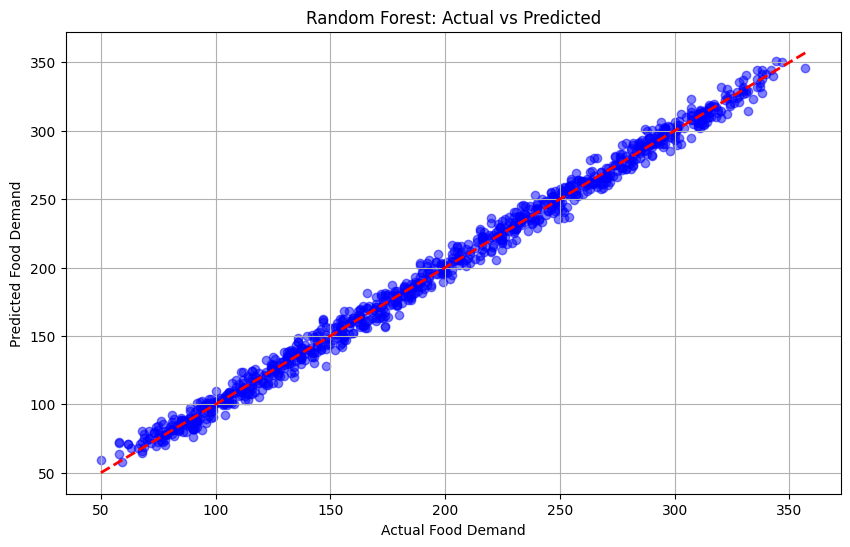

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Food Demand')
plt.ylabel('Predicted Food Demand')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()